## Data Exploration



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
from time import time
import matplotlib as pl
import matplotlib.pyplot as plt
import pickle

In [3]:
dataPath = '/Users/omojumiller/mycode/MachineLearningNanoDegree/IntroToMachineLearning/'
sys.path.append(dataPath+'tools/')
sys.path.append(dataPath+'final_project/')

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from helper_files import compareTwoFeatures, computeFraction

In [4]:
### Load the dictionary containing the dataset

with open(dataPath+'final_project/final_project_dataset.pkl', "r") as data_file:
    data_dict = pickle.load(data_file)

In [5]:
len(data_dict)

146

## Task: Data exploration
- Get descriptive statistics
- If there are outliers, remove outliers

This is an iteratable process. I need to do this for each combination of features I want to use


In [6]:
## Creating a pandas dataframe so that we can easily get descriptive statistics about our features

import itertools


salary = featureFormat(data_dict, ['salary'], remove_any_zeroes=True)
bonus = featureFormat(data_dict, ['bonus'], remove_any_zeroes=True)
exerStockOptions = featureFormat(data_dict, ['exercised_stock_options'], remove_any_zeroes=True)
restrictedStock = featureFormat(data_dict, ['restricted_stock'], remove_any_zeroes=True)

bonus = list(itertools.chain.from_iterable(bonus))
salary = list(itertools.chain.from_iterable(salary))
exerStockOptions = list(itertools.chain.from_iterable(exerStockOptions))
restrictedStock = list(itertools.chain.from_iterable(restrictedStock))




In [7]:
## Pad feature list with zeros to ensure all columns have equal lenght
## Otherwise we won't be able to transfor the individual feature list into a dataframe

size = len(restrictedStock) - len(bonus)
temp = [0.0] * size 

bonus = bonus + temp
print len(bonus)


size = len(restrictedStock) - len(salary)
temp = [0.0] * size 

salary = salary + temp
print len(salary)


size = len(restrictedStock) - len(exerStockOptions)
temp = [0.0] * size 

exerStockOptions = exerStockOptions + temp
print len(exerStockOptions)

110
110
110


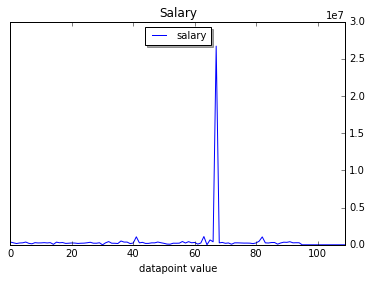

In [13]:
import pandas as pd


df = pd.DataFrame({'salary': salary, 'bonus': bonus, 'exercisedStockOptions': exerStockOptions, 
                   'restrictedStock': restrictedStock})



ax = df['salary'].plot()
ax.yaxis.tick_right()

_= plt.xlabel('datapoint value')
_= plt.title('Salary')
_= plt.legend(loc='upper center', shadow=True, fontsize='medium')

In [14]:
df['salary'].describe()

count         110.000000
mean       485531.436364
std       2529982.802874
min             0.000000
25%        176245.750000
50%        247677.500000
75%        288581.250000
max      26704229.000000
Name: salary, dtype: float64

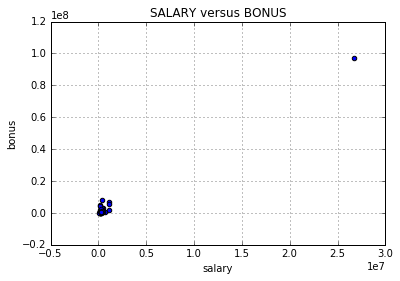

In [15]:
data = compareTwoFeatures('salary', 'bonus', data_dict, "SALARY versus BONUS")

1. I need to find out where that outlier is
2. Find out who it is

In [16]:
np.where(data > 0.8 * 1e8) # This is where the outlier is, what I have to do now is find out who it is


(array([57]), array([1]))

In [17]:
data[57] # So whose bonus is 97343619?
# What’s the name of the dictionary key of this data point?

array([ 26704229.,  97343619.])

In [ ]:
for key, value in data_dict.iteritems():
    if (value['bonus'] >= int(data[57][1]) and 
        value['bonus'] != "NaN" and
        value['salary'] != "NaN"):
        print "{:20}{:12}${:<12,.2f}{:12}${:<12,.2f}".format(key, 'salary is ', value['salary'],
                                                   ' bonus ', value['bonus'])


Found the source of the outlier. It was the `TOTAL` row that was mistakenly read into the data dict

In [ ]:
# Remove the source of the outlier
data_dict.pop( 'TOTAL')

# We can now go back and rerun the regression to see what the data really looks like.

In [ ]:
data = compareTwoFeatures('salary', 'bonus', data_dict, "SALARY versus BONUS cleansed of outliers")

## Task 6: Export data 
Dump  dataset to a .pkl file.

In [ ]:
DATASET_PICKLE_FILENAME = "cleaned_dataset.pkl"

with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
    pickle.dump(data_dict, dataset_outfile)
   